#PHASE 1: DATA LOADING & CLEANING

##1.1 Load Datasets

In [58]:
import pandas as pd
import numpy as np

# Load with correct encoding (handles Cyrillic column names)
transactions = pd.read_csv('транзакции_в_Мобильном_интернет_Банкинге.csv',
encoding='latin-1',
sep=';',
skiprows=1 # Skip Russian header
)

behavior = pd.read_csv('поведенческие_паттерны_клиентов_3.csv',
encoding='latin-1',
sep=';',
skiprows=1
)

In [59]:
# Rename to English<a></a>
trans_cols = ['cst_dim_id', 'transdate', 'transdatetime', 'amount', 'docno', 'direction', 'target']
transactions.columns = trans_cols

behavior_cols = ['transdate','cst_dim_id', 'monthly_os_changes', 'monthly_phone_model_changes',
  'last_phone_model', 'last_os', 'logins_7d', 'logins_30d', 'freq_7d', 'freq_30d', 'freq_change_ratio',
  'logins_ratio_7_30', 'avg_interval_30d', 'std_interval_30d', 'var_interval_30d', 'ewm_interval_7d',
  'burstiness', 'fano_factor','zscore_7d']
behavior.columns = behavior_cols

In [60]:
transactions

cst_dim_id                  transdate              transdatetime  \
0      2.937833e+09  '2025-01-05 00:00:00.000'  '2025-01-05 16:32:02.000'   
1      2.096229e+09  '2025-03-04 00:00:00.000'  '2025-03-04 17:41:57.000'   
2      2.937760e+09  '2025-06-20 00:00:00.000'  '2025-06-20 10:08:07.000'   
3      2.933493e+09  '2025-07-06 00:00:00.000'  '2025-07-06 14:52:13.000'   
4      4.560006e+08  '2024-12-18 00:00:00.000'  '2024-12-18 14:12:25.000'   
...             ...                        ...                        ...   
13108  2.938282e+09  '2025-02-11 00:00:00.000'  '2025-02-11 17:43:15.000'   
13109  2.684693e+09  '2024-12-02 00:00:00.000'  '2024-12-02 09:33:18.000'   
13110  4.560884e+08  '2025-07-06 00:00:00.000'  '2025-07-06 14:19:44.000'   
13111  4.529667e+08  '2025-06-12 00:00:00.000'  '2025-06-12 16:09:44.000'   
13112  4.537209e+08  '2025-08-28 00:00:00.000'  '2025-08-28 12:15:40.000'   

         amount  docno                         direction  target  
0       31000.0   5343  8406e407421ec28bd5f445793ef64fd1       0  
1        4000.0   8442  b3a3d4a6006293195d998957d4f01e42       0  
2        3000.0   9540  22b84292f0ebce65ad0808342615a03b       0  
3         500.0  11685  d677d4e1a0f625e1ad746ea950c9dca9       0  
4       20000.0   7128  87b698d1edae13c21ce86678de3b8546       0  
...         ...    ...                               ...     ...  
13108  239000.0   3829  8cfe18d7e0cff4060f90649295efdaf6       0  
13109  148000.0   8466  0f4b6e1a4bc070cdfdef75c13e38a3e6       0  
13110    2400.0   8926  f17d6300fb05c9772d4943dc6f0b09d6       0  
13111  200000.0   3574  7d1e70b8accfc86fff6ecb2a90704dd6       1  
13112     700.0   6783  bee9a10bc22c161b1c24ffee7fe89c0e       0  

[13113 rows x 7 columns]

In [61]:
behavior

transdate    cst_dim_id  monthly_os_changes  \
0     '2025-03-05 00:00:00.000'  4.530244e+08                   2   
1     '2025-05-19 00:00:00.000'  4.986364e+08                   1   
2     '2025-08-04 00:00:00.000'  2.934905e+09                   1   
3     '2025-03-05 00:00:00.000'  4.561731e+08                   1   
4     '2025-06-26 00:00:00.000'  2.933725e+09                   1   
...                         ...           ...                 ...   
8582  '2025-03-04 00:00:00.000'  4.529513e+08                   1   
8583  '2025-03-30 00:00:00.000'  4.529102e+08                   2   
8584  '2025-03-30 00:00:00.000'  4.549666e+08                   1   
8585  '2025-03-04 00:00:00.000'  4.509121e+08                   2   
8586  '2025-04-01 00:00:00.000'  4.544603e+08                   1   

      monthly_phone_model_changes  last_phone_model      last_os  logins_7d  \
0                               2        Vivo V2116   Android/13          6   
1                               1  Xiaomi_m2006c3mg   Android/10          2   
2                               1        iPhone16,1     iOS/18.5          2   
3                               2        Vivo V2058   Android/13          5   
4                               1        iPhone12,1   iOS/17.6.1         37   
...                           ...               ...          ...        ...   
8582                            1        iPhone10,5  iOS/16.7.10         16   
8583                            2        iPhone14,2     iOS/18.1          7   
8584                            1  Xiaomi 2201117SG   Android/13          8   
8585                            2  Xiaomi M2006C3LG   Android/11         37   
8586                            1        iPhone14,7     iOS/18.2          0   

      logins_30d   freq_7d             freq_30d     freq_change_ratio  \
0             20  0.857143   0.6666666666666666    0.2857142857142857   
1             22  0.285714   0.7333333333333333   -0.6103896103896104   
2              2  0.285714  0.06666666666666667    3.2857142857142856   
3             37  0.714286   1.2333333333333334  -0.42084942084942084   
4            119  5.285714    3.966666666666667   0.33253301320528206   
...          ...       ...                  ...                   ...   
8582          40  2.285714   1.3333333333333333    0.7142857142857143   
8583          38  1.000000   1.2666666666666666  -0.21052631578947364   
8584          26  1.142857   0.8666666666666667   0.31868131868131855   
8585          62  5.285714    2.066666666666667    1.5576036866359444   
8586           6  0.000000                  0.2                  -1.0   

      logins_ratio_7_30  avg_interval_30d  std_interval_30d  \
0              0.300000     131460.000000     213919.478309   
1              0.090909     101520.000000      82733.726442   
2              1.000000      67800.000000         -1.000000   
3              0.135135      61394.594595      76777.321398   
4              0.310924      22751.500000      33089.101678   
...                 ...               ...               ...   
8582           0.400000      47551.000000      87805.264382   
8583           0.184211      68701.621622      97972.572168   
8584           0.307692      85338.181818     129096.796955   
8585           0.596774      40484.545455      62661.679989   
8586           0.000000     360870.000000     373836.465798   

        var_interval_30d  ewm_interval_7d  burstiness    fano_factor  \
0            45761543200     23007.164410    0.238750  348102.412901   
1      6844869490.909091    178980.000000   -0.101959   67423.852353   
2                   -1.0     67800.000000   -1.000000      -1.000000   
3      5894757081.081081      9400.733945    0.111330   96014.268357   
4     1094888649.8319328     18828.504487    0.185127   48123.800621   
...                  ...              ...         ...            ...   
8582   7709764453.220339     12899.501572    0.297395  162136.746929   
8583   9598624897.297297     19188

##1.2 Data Cleaning

In [62]:
# Convert to numeric
transactions['cst_dim_id'] = pd.to_numeric(transactions['cst_dim_id'], errors='coerce')
transactions['amount'] = pd.to_numeric(transactions['amount'], errors='coerce')
transactions['target'] = pd.to_numeric(transactions['target'], errors='coerce')
behavior['cst_dim_id'] = pd.to_numeric(behavior['cst_dim_id'], errors='coerce')
for col in behavior.columns[2:]:
    # if col not in ['last_phone_model', 'last_os']:
        behavior[col] = pd.to_numeric(behavior[col], errors='coerce')

# Remove rows with missing client ID (6 transactions)
transactions = transactions[transactions['cst_dim_id'].notna()]

# Merge datasets
merged = transactions.merge(behavior, on=['cst_dim_id', 'transdate'], how='left')

# Handle missing values in behavior
behavior_cols_to_impute = ['freq_30d', 'freq_change_ratio', 'logins_ratio_7_30', 'monthly_os_changes']
for col in behavior_cols_to_impute:
    if col in merged.columns:
        median_val = merged[col].median()
        merged[col].fillna(median_val, inplace=True)

# Handle -1 sentinel values (missing indicators)
for col in merged.columns[8:]: # Behavioral columns
    if merged[col].dtype in ['float64', 'int64']:
        merged[col] = merged[col].replace(-1, np.nan)
        merged[col].fillna(merged[col].median(), inplace=True)


print(f"Merged dataset shape: {merged.shape}")
print(f"Missing values:\n{merged.isnull().sum()}")
print(f"Fraud rate: {(merged['target']==1).sum() / len(merged) * 100:.2f}%")

Merged dataset shape: (13126, 24)
Missing values:
cst_dim_id                         0
transdate                          0
transdatetime                      0
amount                             0
docno                              0
direction                          0
target                             0
monthly_os_changes                 0
monthly_phone_model_changes        0
last_phone_model               13126
last_os                        13126
logins_7d                          0
logins_30d                         0
freq_7d                            0
freq_30d                           0
freq_change_ratio                  0
logins_ratio_7_30                  0
avg_interval_30d                   0
std_interval_30d                   0
var_interval_30d                   0
ewm_interval_7d                    0
burstiness                         0
fano_factor                        0
zscore_7d                          0
dtype: int64
Fraud rate: 1.26%


/var/folders/46/g_fj_llj4634d9ng0ny2lnwm0000gp/T/ipykernel_34999/929005638.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged[col].fillna(median_val, inplace=True)
/var/folders/46/g_fj_llj4634d9ng0ny2lnwm0000gp/T/ipykernel_34999/929005638.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

#PHASE 2: FEATURE ENGINEERING

##2.1 Transaction-Level Features

In [63]:
from datetime import datetime
import pandas as pd
import numpy as np

# Parse dates
merged['transdate'] = pd.to_datetime(merged['transdate'])
merged['transdatetime'] = pd.to_datetime(merged['transdatetime'])

# Amount features - handle negative/zero values for log transform
merged['amount_log'] = np.log1p(merged['amount'].clip(lower=0))  # clip negative values
merged['amount_bin'] = pd.qcut(merged['amount'], q=4, labels=['tiny', 'small', 'medium', 'large'])

# Temporal features
merged['hour_of_day'] = merged['transdatetime'].dt.hour
merged['day_of_week'] = merged['transdatetime'].dt.dayofweek
merged['is_weekend'] = (merged['day_of_week'] >= 5).astype(int)
merged['month'] = merged['transdate'].dt.month

# Activity features
recipient_freq = merged.groupby('direction').size().to_dict()
merged['recipient_frequency'] = merged['direction'].map(recipient_freq)

# Client activity in time windows - use transform instead of apply
for days in [7, 30]:
    col_name = f'client_tx_count_{days}d'
    merged[col_name] = merged.groupby('cst_dim_id')['transdate'].transform(
        lambda x: (x >= x.iloc[-1] - pd.Timedelta(days=days)).sum()
    )

##2.2 Behavioral Derived Features

In [64]:
# Device instability
merged['device_instability'] = (merged['monthly_os_changes'] +
                                merged['monthly_phone_model_changes']) / 2

# Login surge
merged['login_surge_ratio'] = merged['freq_7d'] / (merged['freq_30d'] + 1e-5)

# Account dormancy
merged['is_inactive_user'] = (merged['logins_30d'] < 5).astype(int)

# Session anomalies
merged['session_interval_anomaly'] = (abs(merged['zscore_7d']) > 2).astype(int)

# Burstiness
merged['login_burstiness_high'] = (merged['burstiness'] > 0.3).astype(int)

# Recent device change
merged['recent_device_change'] = (merged['monthly_phone_model_changes'] > 0).astype(int)


##2.3 Interaction Features

In [65]:
# Interactions
amount_median = merged['amount'].median()
amount_p75 = merged['amount'].quantile(0.75)

merged['device_instability_x_amount'] = (
    merged['device_instability'] * (merged['amount'] > amount_median).astype(int)
)

merged['inactive_x_large_tx'] = (
    merged['is_inactive_user'] * (merged['amount'] > amount_p75).astype(int)
)

# Anomaly timing interaction
merged['anomaly_timing'] = (
    ((merged['hour_of_day'] < 8) | (merged['hour_of_day'] >= 17)).astype(int) *
    merged['session_interval_anomaly']
)

##2.4 Encoding & Feature Selection

In [66]:
# Select final features
feature_cols = [
    # Transaction features
    'amount_log',
    'hour_of_day',
    'is_weekend',
    'recipient_frequency',
    'client_tx_count_7d',
    'client_tx_count_30d',
    # Behavioral features
    'device_instability',
    'login_surge_ratio',
    'is_inactive_user',
    'session_interval_anomaly',
    'login_burstiness_high',
    'recent_device_change',
    'monthly_os_changes',
    'monthly_phone_model_changes',
    'logins_7d',
    'logins_30d',
    'freq_7d',
    'freq_change_ratio',
    'avg_interval_30d',
    'std_interval_30d',
    'burstiness',
    'fano_factor',
    'zscore_7d',
    # Interaction features
    'device_instability_x_amount',
    'inactive_x_large_tx',
    'anomaly_timing'
]

# Convert to categorical for encoding
merged['day_of_week'] = merged['day_of_week'].astype('category')
merged['month'] = merged['month'].astype('category')

# One-Hot Encode categorical features
encoded = pd.get_dummies(
    merged[['day_of_week', 'month', 'amount_bin']],
    prefix=['dow', 'month', 'amount'],
    drop_first=True
)

# Combine features
X = merged[feature_cols].copy()
X = pd.concat([X, encoded], axis=1)
y = merged['target'].copy()

print(f"Final feature matrix shape: {X.shape}")
print(f"Features: {X.columns.tolist()}")

Final feature matrix shape: (13126, 44)
Features: ['amount_log', 'hour_of_day', 'is_weekend', 'recipient_frequency', 'client_tx_count_7d', 'client_tx_count_30d', 'device_instability', 'login_surge_ratio', 'is_inactive_user', 'session_interval_anomaly', 'login_burstiness_high', 'recent_device_change', 'monthly_os_changes', 'monthly_phone_model_changes', 'logins_7d', 'logins_30d', 'freq_7d', 'freq_change_ratio', 'avg_interval_30d', 'std_interval_30d', 'burstiness', 'fano_factor', 'zscore_7d', 'device_instability_x_amount', 'inactive_x_large_tx', 'anomaly_timing', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_11', 'month_12', 'amount_small', 'amount_medium', 'amount_large']


#PHASE 3: DATA SPLITTING

##3.1 Time-Based Train-Val-Test Split

In [67]:
# Sort by date
merged_sorted = merged.sort_values('transdate').reset_index(drop=True)

# Calculate split points
n = len(merged_sorted)
train_idx = int(n * 0.6)
val_idx = int(n * 0.8)

# Split
idx_train = range(0, train_idx)
idx_val = range(train_idx, val_idx)
idx_test = range(val_idx, n)

X_train = X.iloc[idx_train]
X_val = X.iloc[idx_val]
X_test = X.iloc[idx_test]

y_train = y.iloc[idx_train]
y_val = y.iloc[idx_val]
y_test = y.iloc[idx_test]

print(f"Train: {len(X_train)} ({y_train.mean()*100:.2f}% fraud)")
print(f"Val: {len(X_val)} ({y_val.mean()*100:.2f}% fraud)")
print(f"Test: {len(X_test)} ({y_test.mean()*100:.2f}% fraud)")


Train: 7875 (1.27% fraud)
Val: 2625 (1.22% fraud)
Test: 2626 (1.26% fraud)


##3.2 Scaling & SMOTE

In [68]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# SMOTE on training set only
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"After SMOTE: {len(X_train_resampled)} samples, {y_train_resampled.mean()*100:.2f}% fraud")


After SMOTE: 8552 samples, 9.09% fraud


#PHASE 4: MODEL TRAINING

##4.1 XGBoost

In [69]:
%pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [70]:
import optuna
import xgboost as xgb
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import precision_recall_curve, auc

def pr_auc_score(y_true, y_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    return auc(recall, precision)

def objective_xgb_pr_auc(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 4, 8),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.01, 0.03, 0.05, 0.1]),
        "subsample": trial.suggest_categorical("subsample", [0.6, 0.8, 1.0]),
        "colsample_bytree": trial.suggest_categorical("colsample_bytree", [0.6, 0.8, 1.0]),
        "min_child_weight": 5,
        "scale_pos_weight": 39,
        "eval_metric": "logloss",
        "random_state": 42,
        "n_jobs": -1,
        "tree_method": "hist",
    }

    model = xgb.XGBClassifier(**params)
    model.fit(X_train_scaled, y_train)

    y_proba_val = model.predict_proba(X_val_scaled)[:, 1]

    # Metric to optimize: PR-AUC
    pr_auc = pr_auc_score(y_val, y_proba_val)

    return pr_auc

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb_pr_auc, n_trials=50)
xgb_best_params = study_xgb.best_params

print("Best params:", xgb_best_params)
print("Best PR-AUC:", study_xgb.best_value)

[I 2025-11-27 23:41:16,478] A new study created in memory with name: no-name-805d7a38-a279-4a98-ac34-572cb9a874d6
[I 2025-11-27 23:41:16,700] Trial 0 finished with value: 0.583104167836842 and parameters: {'n_estimators': 225, 'max_depth': 5, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 0 with value: 0.583104167836842.
[I 2025-11-27 23:41:16,874] Trial 1 finished with value: 0.6257896678434572 and parameters: {'n_estimators': 130, 'max_depth': 8, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 1 with value: 0.6257896678434572.
[I 2025-11-27 23:41:17,158] Trial 2 finished with value: 0.5799030102879006 and parameters: {'n_estimators': 247, 'max_depth': 8, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 1 with value: 0.6257896678434572.
[I 2025-11-27 23:41:17,453] Trial 3 finished with value: 0.5670934079667419 and parameters: {'n_estimators': 217, 'max_depth': 7, 'learning_rate': 0.01, 'su

Best params: {'n_estimators': 189, 'max_depth': 6, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.6}
Best PR-AUC: 0.6401763927321172


In [71]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(**xgb_best_params)

xgb_model.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_val_scaled, y_val)]
)

pred_xgb_val = xgb_model.predict_proba(X_val_scaled)[:, 1]
pred_xgb_test = xgb_model.predict_proba(X_test_scaled)[:, 1]

[0]	validation_0-logloss:0.11756
[1]	validation_0-logloss:0.10734
[2]	validation_0-logloss:0.09837
[3]	validation_0-logloss:0.09126
[4]	validation_0-logloss:0.08645
[5]	validation_0-logloss:0.08059
[6]	validation_0-logloss:0.07581
[7]	validation_0-logloss:0.07067
[8]	validation_0-logloss:0.06634
[9]	validation_0-logloss:0.06251
[10]	validation_0-logloss:0.05901
[11]	validation_0-logloss:0.05602
[12]	validation_0-logloss:0.05373
[13]	validation_0-logloss:0.05117
[14]	validation_0-logloss:0.04940
[15]	validation_0-logloss:0.04739
[16]	validation_0-logloss:0.04595
[17]	validation_0-logloss:0.04424
[18]	validation_0-logloss:0.04324
[19]	validation_0-logloss:0.04180
[20]	validation_0-logloss:0.04078
[21]	validation_0-logloss:0.03987
[22]	validation_0-logloss:0.03880
[23]	validation_0-logloss:0.03777
[24]	validation_0-logloss:0.03686
[25]	validation_0-logloss:0.03628
[26]	validation_0-logloss:0.03559
[27]	validation_0-logloss:0.03493
[28]	validation_0-logloss:0.03404
[29]	validation_0-loglos

##4.2 LightGBM

In [72]:
import lightgbm as lgb
from sklearn.metrics import f1_score, recall_score

def objective_lgb(trial):
    params = {
        "n_estimators": 200,
        "num_leaves": trial.suggest_categorical("num_leaves", [20, 31, 50, 70]),
        "max_depth": trial.suggest_categorical("max_depth", [5, 7, 10, 15]),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.01, 0.03, 0.05, 0.1]),
        "min_data_in_leaf": trial.suggest_categorical("min_data_in_leaf", [10, 20, 30]),
        "feature_fraction": trial.suggest_categorical("feature_fraction", [0.6, 0.8, 1.0]),
        "bagging_fraction": trial.suggest_categorical("bagging_fraction", [0.6, 0.8, 1.0]),
        "bagging_freq": 1,
        "is_unbalance": True,
        "random_state": 42,
        "n_jobs": -1,
        "objective": "binary",
        "metric": "auc",
        "verbose": -1,
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(X_train_scaled, y_train)

    y_proba_val = model.predict_proba(X_val_scaled)[:, 1]
    # Metric to optimize: PR-AUC
    pr_auc = pr_auc_score(y_val, y_proba_val)

    return pr_auc

study_lgb = optuna.create_study(direction="maximize")
study_lgb.optimize(objective_lgb, n_trials=50)
lgb_best_params = study_lgb.best_params

print("Best LGB params:", lgb_best_params)
print("Best LGB F1:", study_lgb.best_value)


[I 2025-11-27 23:41:27,625] A new study created in memory with name: no-name-bddd9aac-9da7-4729-a7ce-b5a7f81424fc
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-11-27 23:41:28,231] Trial 0 finished with value: 0.5363117866423551 and parameters: {'num_leaves': 31, 'max_depth': 10, 'learning_rate': 0.01, 'min_data_in_leaf': 20, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}. Best is trial 0 with value: 0.5363117866423551.
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-11-27 23:41:28,644] Trial 1 finished with value: 0.5319313042663985 and parameters: {'num_leaves': 50, 'max_depth': 5, 'learning_rate': 0.03, 'min_data_in_leaf': 30, 'feature_fraction': 0.8, 'bagging_fraction': 1.0}. B

Best LGB params: {'num_leaves': 50, 'max_depth': 7, 'learning_rate': 0.05, 'min_data_in_leaf': 20, 'feature_fraction': 0.6, 'bagging_fraction': 0.6}
Best LGB F1: 0.6593082227503922


In [73]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(**lgb_best_params)

lgb_model.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_val_scaled, y_val)],
    eval_metric='auc'
)

pred_lgb_val = lgb_model.predict_proba(X_val_scaled)[:, 1]
pred_lgb_test = lgb_model.predict_proba(X_test_scaled)[:, 1]

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


##4.3 Random Forest

In [74]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score

def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_categorical("n_estimators", [100, 200, 300, 400]),
        "max_depth": trial.suggest_categorical("max_depth", [10, 15, 20, 25, None]),
        "min_samples_split": trial.suggest_categorical("min_samples_split", [2, 5, 10, 15]),
        "min_samples_leaf": trial.suggest_categorical("min_samples_leaf", [1, 2, 5, 10]),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "class_weight": "balanced",
        "oob_score": True,
        "n_jobs": -1,
        "random_state": 42
    }

    model = RandomForestClassifier(**params)
    model.fit(X_train_scaled, y_train)

    y_proba_val = model.predict_proba(X_val_scaled)[:, 1]
    # Metric to optimize: PR-AUC
    pr_auc = pr_auc_score(y_val, y_proba_val)

    return pr_auc

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=50)
rf_best_params = study_rf.best_params

print("Best RF params:", rf_best_params)
print("Best RF F1:", study_rf.best_value)


[I 2025-11-27 23:42:11,277] A new study created in memory with name: no-name-4b4726fe-9d9c-488b-afd0-977b4fda074c
[I 2025-11-27 23:42:11,796] Trial 0 finished with value: 0.5708143398994668 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.5708143398994668.
[I 2025-11-27 23:42:12,003] Trial 1 finished with value: 0.580984646464879 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 1 with value: 0.580984646464879.
[I 2025-11-27 23:42:12,194] Trial 2 finished with value: 0.5574399284950682 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 1 with value: 0.580984646464879.
[I 2025-11-27 23:42:12,564] Trial 3 finished with value: 0.45792037119891993 and parameters: {'n_estimators': 100, 'max_depth': 20, '

Best RF params: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}
Best RF F1: 0.61435998041021


In [75]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(**rf_best_params)

rf_model.fit(X_train_resampled, y_train_resampled)

pred_rf_val = rf_model.predict_proba(X_val_scaled)[:, 1]
pred_rf_test = rf_model.predict_proba(X_test_scaled)[:, 1]


##4.4 Ensemble Stacking

In [76]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create meta-features from validation predictions
meta_features_val = np.column_stack([pred_xgb_val, pred_lgb_val, pred_rf_val])
meta_features_test = np.column_stack([pred_xgb_test, pred_lgb_test, pred_rf_test])

# Train meta-learner
meta_learner = LogisticRegression(C=1.0, random_state=42)
meta_learner.fit(meta_features_val, y_val)

# Final predictions
pred_ensemble_val = meta_learner.predict_proba(meta_features_val)[:, 1]
pred_ensemble_test = meta_learner.predict_proba(meta_features_test)[:, 1]

#PHASE 5: EVALUATION & OPTIMIZATION
##5.1 Metrics Computation

In [77]:
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, precision_recall_curve
)

def compute_metrics(y_true, y_pred_proba, threshold=0.5):
    y_pred = (y_pred_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    metrics = {
        'roc_auc': roc_auc_score(y_true, y_pred_proba),
        'precision': tp / (tp + fp) if (tp + fp) > 0 else 0,
        'recall': tp / (tp + fn) if (tp + fn) > 0 else 0,
        'f1': f1_score(y_true, y_pred),
        'specificity': tn / (tn + fp) if (tn + fp) > 0 else 0,
        'tp': tp,
        'fp': fp,
        'fn': fn,
        'tn': tn
    }
    return metrics

# Test set evaluation
test_metrics = compute_metrics(y_test, pred_xgb_test, threshold=0.3)

print(f"Test Metrics (threshold=0.30):")
for k, v in test_metrics.items():
    print(f"  {k}: {v:.4f}")


Test Metrics (threshold=0.30):
  roc_auc: 0.9917
  precision: 0.6410
  recall: 0.7576
  f1: 0.6944
  specificity: 0.9946
  tp: 25.0000
  fp: 14.0000
  fn: 8.0000
  tn: 2579.0000


##5.2 Threshold Optimization

In [78]:
# Find optimal threshold minimizing business cost
best_threshold = 0.5
best_cost = float('inf')

for threshold in np.arange(0.01, 0.99, 0.01):
    y_pred = (pred_ensemble_test >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    cost = 0.20 * fp + 1.00 * fn  # Cost function

    if cost < best_cost:
        best_cost = cost
        best_threshold = threshold

print(f"Optimal threshold: {best_threshold:.2f}")
print(f"Cost at optimal: {best_cost:.2f}")

# Final metrics at optimal threshold
final_metrics = compute_metrics(y_test, pred_ensemble_test, threshold=best_threshold)

print(f"\nFinal Test Metrics:")
for k, v in final_metrics.items():
    print(f"  {k}: {v:.4f}")


Optimal threshold: 0.03
Cost at optimal: 9.80

Final Test Metrics:
  roc_auc: 0.9941
  precision: 0.5385
  recall: 0.8485
  f1: 0.6588
  specificity: 0.9907
  tp: 28.0000
  fp: 24.0000
  fn: 5.0000
  tn: 2569.0000


# 6. Feature Importance

In [79]:
# pip install shap

=== XGBoost SHAP Explanation ===
Sample 100 - Top 5 XGBoost factors:
  recipient_frequency: 0.0098
  amount_log: 0.0033
  dow_4: 0.0027
  device_instability_x_amount: 0.0019
  client_tx_count_30d: 0.0018

=== LightGBM SHAP Explanation ===
Sample 100 - Top 5 LightGBM factors:
  recipient_frequency: 0.0033
  amount_log: 0.0023
  device_instability_x_amount: 0.0016
  dow_4: 0.0012
  month_8: 0.0011

=== Global Feature Importance (XGBoost) ===


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/var/folders/46/g_fj_llj4634d9ng0ny

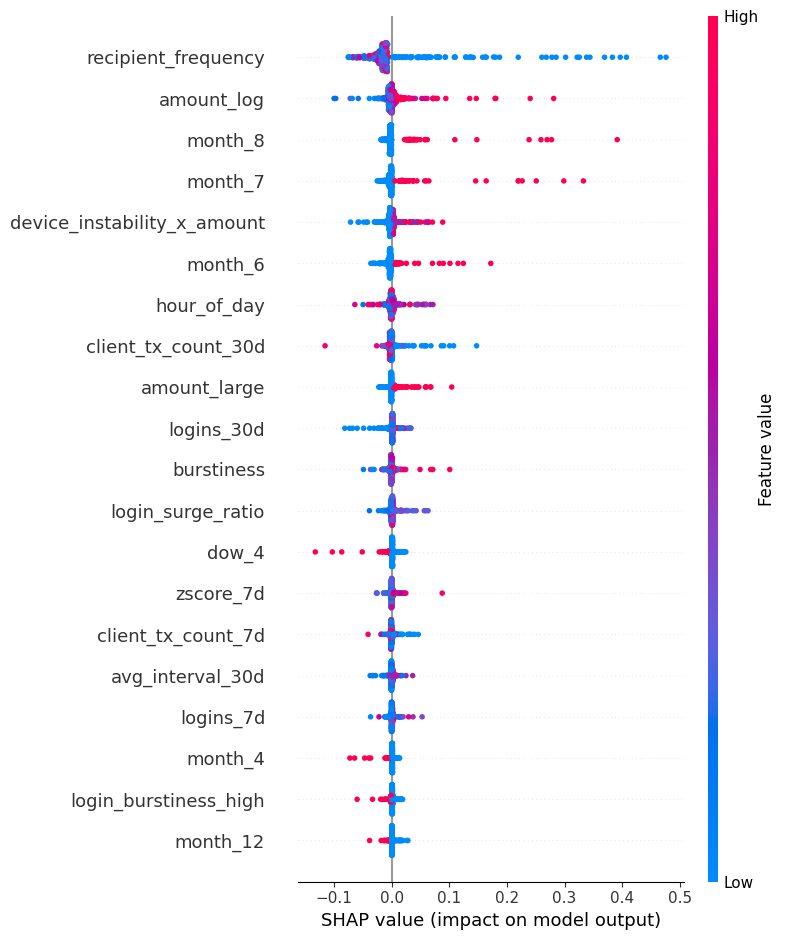


=== Global Feature Importance (LightGBM) ===


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-p

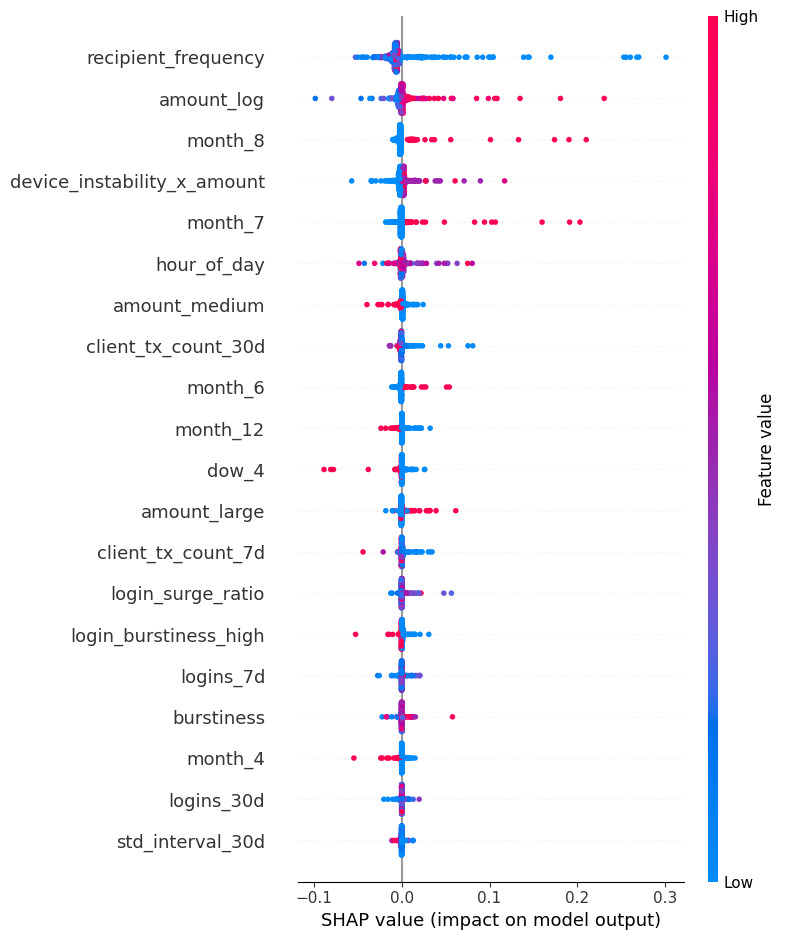

In [92]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Define prediction wrapper functions
def xgb_predict(X):
    return xgb_model.predict_proba(X)[:, 1]

def lgb_predict(X):
    return lgb_model.predict_proba(X)[:, 1]

sample_idx = 100
sample_2d = X_test_scaled[sample_idx].reshape(1, -1)

# Create masker for SHAP Explainer
masker = shap.maskers.Independent(X_test_scaled)

# 1. SHAP for XGBoost
print("=== XGBoost SHAP Explanation ===")
explainer_xgb = shap.Explainer(xgb_predict, masker)
shap_values_xgb = explainer_xgb(sample_2d)
shap_values_xgb_array = shap_values_xgb.values[0] if hasattr(shap_values_xgb, 'values') else shap_values_xgb[0]

top_features_xgb = sorted(
    zip(range(len(shap_values_xgb_array)), np.abs(shap_values_xgb_array)),
    key=lambda x: x[1],
    reverse=True
)[:5]

print(f"Sample {sample_idx} - Top 5 XGBoost factors:")
for feat_idx, importance in top_features_xgb:
    feature_name = X.columns[feat_idx] if feat_idx < len(X.columns) else f"Feature_{feat_idx}"
    print(f"  {feature_name}: {importance:.4f}")

# 2. SHAP for LightGBM
print("\n=== LightGBM SHAP Explanation ===")
explainer_lgb = shap.Explainer(lgb_predict, masker)
shap_values_lgb = explainer_lgb(sample_2d)
shap_values_lgb_array = shap_values_lgb.values[0] if hasattr(shap_values_lgb, 'values') else shap_values_lgb[0]

top_features_lgb = sorted(
    zip(range(len(shap_values_lgb_array)), np.abs(shap_values_lgb_array)),
    key=lambda x: x[1],
    reverse=True
)[:5]

print(f"Sample {sample_idx} - Top 5 LightGBM factors:")
for feat_idx, importance in top_features_lgb:
    feature_name = X.columns[feat_idx] if feat_idx < len(X.columns) else f"Feature_{feat_idx}"
    print(f"  {feature_name}: {importance:.4f}")

# 3. Global Feature Importance - XGBoost
print("\n=== Global Feature Importance (XGBoost) ===")
sample_size = min(500, len(X_test_scaled))
shap_values_xgb_global = explainer_xgb(X_test_scaled[:sample_size])
shap_values_xgb_global_array = shap_values_xgb_global.values if hasattr(shap_values_xgb_global, 'values') else shap_values_xgb_global

shap.summary_plot(shap_values_xgb_global_array, X_test_scaled[:sample_size], 
                  feature_names=X.columns, show=False)
plt.savefig('shap_summary_xgb.png', dpi=100, bbox_inches='tight')
plt.show()

# 4. Global Feature Importance - LightGBM
print("\n=== Global Feature Importance (LightGBM) ===")
shap_values_lgb_global = explainer_lgb(X_test_scaled[:sample_size])
shap_values_lgb_global_array = shap_values_lgb_global.values if hasattr(shap_values_lgb_global, 'values') else shap_values_lgb_global

shap.summary_plot(shap_values_lgb_global_array, X_test_scaled[:sample_size], 
                  feature_names=X.columns, show=False)
plt.savefig('shap_summary_lgb.png', dpi=100, bbox_inches='tight')
plt.show()


PermutationExplainer explainer: 2627it [00:36, 52.12it/s]                          
/var/folders/46/g_fj_llj4634d9ng0ny2lnwm0000gp/T/ipykernel_34999/2101672502.py:37: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_xgb, X_test_scaled, feature_names=X.columns, show=False)


=== XGBoost SHAP Explanation (Sample 100) ===
Sample 100 - Top 5 XGBoost factors:
  recipient_frequency: 0.0074
  dow_4: 0.0045
  client_tx_count_30d: 0.0026
  amount_log: 0.0024
  month_6: 0.0019

=== Global Feature Importance (XGBoost) ===


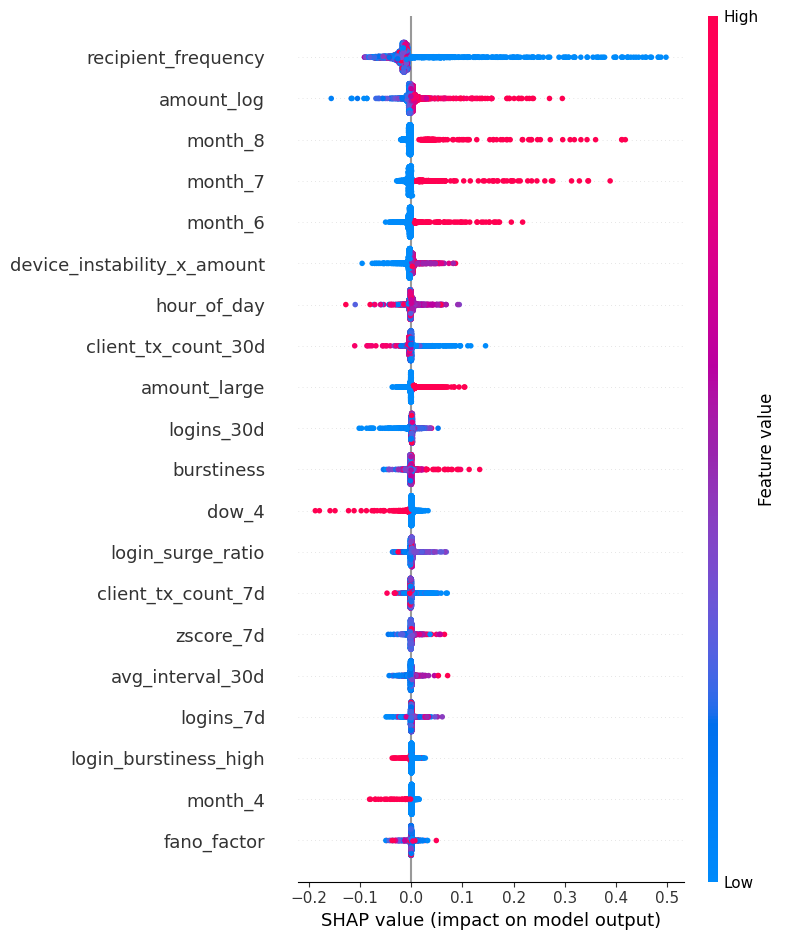

In [93]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Define callable prediction function returning positive class probabilities
def xgb_predict_proba(X):
    return xgb_model.predict_proba(X)[:, 1]

sample_idx = 100
sample_2d = X_test_scaled[sample_idx].reshape(1, -1)

# Create masker - Independent assumes feature independence, common choice
masker = shap.maskers.Independent(X_test_scaled)

# Initialize explainer with callable function
explainer_xgb = shap.Explainer(xgb_predict_proba, masker)

# Compute SHAP values for all test samples
shap_values_xgb = explainer_xgb(X_test_scaled)

# Local explanation for one sample
print("=== XGBoost SHAP Explanation (Sample 100) ===")

top_features_xgb = sorted(
    zip(range(len(shap_values_xgb[sample_idx].values)), np.abs(shap_values_xgb[sample_idx].values)),
    key=lambda x: x[1],
    reverse=True
)[:5]

print(f"Sample {sample_idx} - Top 5 XGBoost factors:")
for feat_idx, importance in top_features_xgb:
    feature_name = X.columns[feat_idx] if feat_idx < len(X.columns) else f"Feature_{feat_idx}"
    print(f"  {feature_name}: {importance:.4f}")

# Global explanation plot
print("\n=== Global Feature Importance (XGBoost) ===")
shap.summary_plot(shap_values_xgb, X_test_scaled, feature_names=X.columns, show=False)
plt.savefig('shap_summary_xgb.png', dpi=100, bbox_inches='tight')
plt.show()


In [95]:
import shap
import numpy as np
import pandas as pd

# ---- XGBoost SHAP importance ----
# Use wrapper function to avoid TreeExplainer base_score issue
def xgb_predict(X):
    return xgb_model.predict_proba(X)[:, 1]

masker_xgb = shap.maskers.Independent(X_test_scaled)
explainer_xgb = shap.Explainer(xgb_predict, masker_xgb)
shap_values_xgb_obj = explainer_xgb(X_test_scaled)

# Extract values array
if hasattr(shap_values_xgb_obj, 'values'):
    shap_xgb = shap_values_xgb_obj.values
else:
    shap_xgb = shap_values_xgb_obj

mean_abs_shap_xgb = np.abs(shap_xgb).mean(axis=0)

imp_xgb = (
    pd.DataFrame({"feature": X.columns, "mean_abs_shap": mean_abs_shap_xgb})
    .sort_values("mean_abs_shap", ascending=False)
    .reset_index(drop=True)
)

# ---- LightGBM SHAP importance ----
def lgb_predict(X):
    return lgb_model.predict_proba(X)[:, 1]

masker_lgb = shap.maskers.Independent(X_test_scaled)
explainer_lgb = shap.Explainer(lgb_predict, masker_lgb)
shap_values_lgb_obj = explainer_lgb(X_test_scaled)

# Extract values array
if hasattr(shap_values_lgb_obj, 'values'):
    shap_lgb = shap_values_lgb_obj.values
else:
    shap_lgb = shap_values_lgb_obj

# if LightGBM returns list (binary classification), take class 1
if isinstance(shap_lgb, list):
    shap_lgb = shap_lgb[1]

mean_abs_shap_lgb = np.abs(shap_lgb).mean(axis=0)

imp_lgb = (
    pd.DataFrame({"feature": X.columns, "mean_abs_shap": mean_abs_shap_lgb})
    .sort_values("mean_abs_shap", ascending=False)
    .reset_index(drop=True)
)

print("Top 10 XGBoost features:\n", imp_xgb.head(10), "\n")
print("Top 10 LightGBM features:\n", imp_lgb.head(10))


PermutationExplainer explainer: 2627it [00:36, 52.69it/s]                          
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifie

Top 10 XGBoost features:
                        feature  mean_abs_shap
0          recipient_frequency       0.034077
1                   amount_log       0.008747
2                      month_8       0.007885
3                      month_7       0.007614
4  device_instability_x_amount       0.005944
5                      month_6       0.005836
6                  hour_of_day       0.004527
7          client_tx_count_30d       0.004224
8                 amount_large       0.003870
9                   logins_30d       0.003332 

Top 10 LightGBM features:
                        feature  mean_abs_shap
0          recipient_frequency       0.014763
1                   amount_log       0.004474
2  device_instability_x_amount       0.004083
3                      month_8       0.003985
4                      month_7       0.002949
5                  hour_of_day       0.002361
6                amount_medium       0.001808
7          client_tx_count_30d       0.001640
8                      mo

In [97]:


# ---- Define threshold quantile ----
q = 0.10  # bottom 10% - features with lowest importance

# ---- XGBoost unused features ----
thr_xgb = imp_xgb["mean_abs_shap"].quantile(q)
unused_xgb = imp_xgb[imp_xgb["mean_abs_shap"] <= thr_xgb]["feature"].tolist()

# ---- LightGBM unused features ----
thr_lgb = imp_lgb["mean_abs_shap"].quantile(q)
unused_lgb = imp_lgb[imp_lgb["mean_abs_shap"] <= thr_lgb]["feature"].tolist()

# ---- Find features unused in BOTH models ----
unused_both = sorted(set(unused_xgb).intersection(unused_lgb))

print(f"\nXGBoost threshold (q={q}): {thr_xgb:.6f}")
print(f"LightGBM threshold (q={q}): {thr_lgb:.6f}")
print(f"\nFeatures almost unused in XGBoost ({len(unused_xgb)} total):")
for f in unused_xgb[:10]:  # Show first 10
    print(f"  {f}")

print(f"\nFeatures almost unused in LightGBM ({len(unused_lgb)} total):")
for f in unused_lgb[:10]:  # Show first 10
    print(f"  {f}")

print(f"\nFeatures almost unused in BOTH models ({len(unused_both)} total):")
for f in unused_both:
    print(f"  {f}")



XGBoost threshold (q=0.1): 0.000056
LightGBM threshold (q=0.1): 0.000034

Features almost unused in XGBoost (5 total):
  session_interval_anomaly
  inactive_x_large_tx
  recent_device_change
  month_11
  anomaly_timing

Features almost unused in LightGBM (5 total):
  session_interval_anomaly
  inactive_x_large_tx
  month_11
  recent_device_change
  anomaly_timing

Features almost unused in BOTH models (5 total):
  anomaly_timing
  inactive_x_large_tx
  month_11
  recent_device_change
  session_interval_anomaly


#PHASE 7: DEPLOYMENT & DEMO
##7.1 Inference Pipeline

In [98]:
import pickle
import numpy as np

# Save models
with open('models.pkl', 'wb') as f:
    pickle.dump({
        'xgb': xgb_model,
        'lgb': lgb_model,
        'best_threshold' : best_threshold,
        'rf': rf_model,
        'meta_learner': meta_learner,
        'scaler': scaler
    }, f)

In [99]:
# Kill all existing ngrok processes
!pkill -f ngrok
import time
time.sleep(2)

# Now try again
from pyngrok import ngrok

ngrok.set_auth_token("363ztB5jL7ZMgk1PCPTuWpzl4IO_3ASuwrF6zJmChq8eH8dDu")
public_url = ngrok.connect(8501)

print(f"\n{'='*80}")
print(f"✓ STREAMLIT APP IS LIVE!")
print(f"{'='*80}")
print(f"\n🔗 Open this link on your iPad/browser:\n")
print(f"   {public_url}\n")
print(f"{'='*80}\n")


✓ STREAMLIT APP IS LIVE!

🔗 Open this link on your iPad/browser:

   NgrokTunnel: "https://lexicographically-unopiatic-magaret.ngrok-free.dev" -> "http://localhost:8501"




In [101]:
!streamlit run app.py --server.port 8501 --logger.level=error


2025-11-28 00:03:47.267 Port 8501 is already in use
